### Load Packages

In [1]:
import numpy as np
import pandas as pd

### Load Datasets

In [2]:
from sklearn.datasets import load_iris, load_digits

iris = load_iris()
digits = load_digits()

### Split Data

In [3]:
X = digits.data
y = digits.target

In [4]:
X[0].shape

(64,)

0


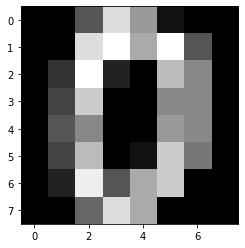

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(8,8),cmap="gray")
print(y[0])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.20)

In [8]:
X.shape
# print(digits.DESCR)

(1797, 64)

In [9]:
x_train.shape

(1437, 64)

### Cross Validation on DT & RF

In [10]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=50,random_state=10)

In [12]:
kf = KFold(5, shuffle=True)

cv_rf = cross_val_score(rf, x_train,y_train, cv=kf, scoring='accuracy')
cv_dt = cross_val_score(dt, x_train,y_train, cv=kf, scoring='accuracy')

In [13]:
print("Decision Tree Score: ", cv_dt)
print("average: ", np.mean(cv_dt))
print("--------------------------------")

print("Random Forest Score: ",cv_rf)
print("average: ", np.mean(cv_rf))

Decision Tree Score:  [0.81944444 0.85069444 0.79790941 0.86062718 0.8466899 ]
average:  0.8350730739450253
--------------------------------
Random Forest Score:  [0.98263889 0.94444444 0.95818815 0.96864111 0.98606272]
average:  0.9679950638792102


### Parameter Tuning for RF

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
ran = RandomForestClassifier(random_state=10)

In [16]:
param = {"n_estimators":[10,20,30,40,50,60,70]}

In [17]:
grid = GridSearchCV(ran, param_grid=param, cv=kf, scoring="accuracy",return_train_score=True)

In [18]:
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sc

In [19]:
grid.best_params_

{'n_estimators': 30}

In [20]:
grid.best_score_

0.9707825203252034

In [21]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [26]:
df = pd.DataFrame(grid.cv_results_)[["params","mean_test_score"]]
df.head()

params  mean_test_score
0  {'n_estimators': 10}         0.947801
1  {'n_estimators': 20}         0.965210
2  {'n_estimators': 30}         0.970783
3  {'n_estimators': 40}         0.967301
4  {'n_estimators': 50}         0.966601

### Build best classifier

In [27]:
model = grid.best_estimator_
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [28]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [29]:
print("Training Score: ",model.score(x_train,y_train))
print("Testing Score: ",model.score(x_test,y_test))

Training Score:  1.0
Testing Score:  0.9638888888888889


In [30]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Deployment

In [31]:
import cv2

img = cv2.imread("test.png",0)
print(img.shape)
plt.imshow(img)

(208, 180)


In [32]:
img1 = cv2.resize(img,(8,8))
plt.imshow(img1,cmap="gray")

In [33]:
tst = img1.reshape(1,-1)
print(tst.shape)
model.predict(tst)

(1, 64)


array([0])

In [ ]:
# TASK

# Build Predictive Model on Fashion MNIST dataset

# Use GridSearchCV to choose Best Model

# - SVM
# - Logistic Regression
# - KNN
# - Random Forest
